In [1]:
%run convergence.py

In [2]:
%%time
H_inf = 2e12
f_a = 3e14
Gamma_inf_list = np.geomspace(1e6, 1e9, 11)
m_a_list = np.geomspace(1e6, 1e9, 10)
def f(Gamma_inf, m_a, i, j):
    n = i + j * len(m_a_list) + 1
    print("step:", n, "of", len(Gamma_inf_list) * len(m_a_list), end="")
    start = time.time()
    x = compute_asymmetry(H_inf, Gamma_inf, (m_a,), f_a, calc_init_time=True)
    end = time.time()
    print(" done (%f seconds)" % (end - start))
    return x
eta = np.array([[f(Gamma_inf, m_a, i, j) 
                 for i, m_a in enumerate(m_a_list)] for j, Gamma_inf in enumerate(Gamma_inf_list)])

step: 1 of 110

/home/jana/Documents/masters-project/transport_eq_in_time/decay_process.py:36: RuntimeWarning: invalid value encountered in power
  T = T_const * rho_rad**(1/4)
/home/jana/Documents/masters-project/transport_eq_in_time/decay_process.py:37: RuntimeWarning: invalid value encountered in sqrt
  H = H_const * np.sqrt(rho_rad + rho_field)
/home/jana/Documents/masters-project/transport_eq_in_time/decay_process.py:46: RuntimeWarning: divide by zero encountered in true_divide
  T_dot = np.where(T == 0, np.inf, T_dot_const * (Gamma * rho_field - 4*H*rho_rad) / T**3)
/home/jana/Documents/masters-project/transport_eq_in_time/decay_process.py:46: RuntimeWarning: divide by zero encountered in double_scalars
  T_dot = np.where(T == 0, np.inf, T_dot_const * (Gamma * rho_field - 4*H*rho_rad) / T**3)
/home/jana/Documents/masters-project/transport_eq_in_time/decay_process.py:12: RuntimeWarning: invalid value encountered in sqrt
  H = np.sqrt(rho_field + rho_rad) * C


 done (2.954646 seconds)
step: 2 of 110 done (3.289764 seconds)
step: 3 of 110 done (3.356006 seconds)
step: 4 of 110 done (3.914402 seconds)
step: 5 of 110

/home/jana/Documents/masters-project/transport_eq_in_time/decay_process.py:36: RuntimeWarning: invalid value encountered in double_scalars
  T = T_const * rho_rad**(1/4)


 done (4.608491 seconds)
step: 6 of 110 done (4.941022 seconds)
step: 7 of 110 done (6.098836 seconds)
step: 8 of 110 done (7.697726 seconds)
step: 9 of 110 done (13.238779 seconds)
step: 10 of 110 done (18.092072 seconds)
step: 11 of 110 done (2.545217 seconds)
step: 12 of 110 done (3.184390 seconds)
step: 13 of 110 done (3.109143 seconds)
step: 14 of 110 done (3.615355 seconds)
step: 15 of 110 done (4.319523 seconds)
step: 16 of 110 done (4.591423 seconds)
step: 17 of 110 done (4.736145 seconds)
step: 18 of 110 done (5.643100 seconds)
step: 19 of 110 done (7.240982 seconds)
step: 20 of 110 done (9.841259 seconds)
step: 21 of 110 done (2.886552 seconds)
step: 22 of 110 done (2.881886 seconds)
step: 23 of 110 done (3.475732 seconds)
step: 24 of 110 done (3.568994 seconds)
step: 25 of 110 done (3.911505 seconds)
step: 26 of 110 done (4.286368 seconds)
step: 27 of 110 done (4.299641 seconds)
step: 28 of 110 done (4.859697 seconds)
step: 29 of 110 done (5.740531 seconds)
step: 30 of 110 d

/home/jana/Documents/masters-project/transport_eq_in_time/decay_process.py:9: RuntimeWarning: overflow encountered in exp
  t = np.exp(log_t)


 done (3.749633 seconds)
step: 102 of 110 done (3.967541 seconds)
step: 103 of 110 done (3.652473 seconds)
step: 104 of 110 done (3.965692 seconds)
step: 105 of 110 done (4.395335 seconds)
step: 106 of 110 done (4.961474 seconds)
step: 107 of 110 done (5.257663 seconds)
step: 108 of 110 done (5.499109 seconds)
step: 109 of 110 done (6.159387 seconds)
step: 110 of 110 done (5.673651 seconds)
CPU times: user 8min 10s, sys: 1.22 s, total: 8min 11s
Wall time: 8min 14s


Text(0, 0.5, '$\\Gamma_\\mathrm{inf}$ / GeV')

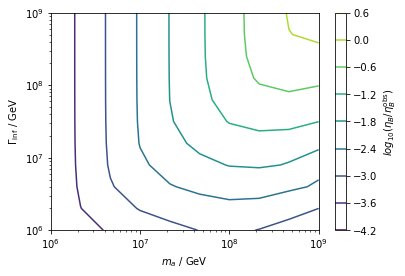

In [3]:
eta_observed = 6e-10 # from paper
plt.contour(m_a_list, Gamma_inf_list, np.log10(eta / eta_observed))
plt.xscale("log")
plt.yscale("log")
plt.colorbar(label=r"$log_{10}(\eta_B / \eta_B^\mathrm{obs})$")
plt.xlabel("$m_a$ / GeV")
plt.ylabel(r"$\Gamma_\mathrm{inf}$ / GeV")